In [ ]:
import cv2
import numpy as np
from numpy.linalg import norm

def cos_sim_feature(vector1, vector2):
    # ベクトルのノルムを計算
    norm_vector1 = norm(vector1)
    norm_vector2 = norm(vector2)

    # コサイン類似度を計算
    cosine_similarity = np.dot(vector1, vector2) / (norm_vector1 * norm_vector2)
    
    return cosine_similarity

TorchデータをNPY

In [34]:
from glob import glob
import os
from tqdm import tqdm
import numpy as np
import torch
import itertools



DATASET_PATH = "/a/yu-yamaoka/Scientific_reports/DINO_Output/TRAIN_CP_20231201_111120_Ours4MinSize=40_Crop=64_FromPreTrainModel/epoch95_output"
feature_train_pth = torch.load(os.path.join(DATASET_PATH, "trainfeat.pth"))
label_train_pth = torch.load(os.path.join(DATASET_PATH, "trainlabels.pth"))
feature_test_pth = torch.load(os.path.join(DATASET_PATH, "testfeat.pth"))
label_test_pth = torch.load(os.path.join(DATASET_PATH, "testlabels.pth"))

label_data = label_test_pth.numpy()
feature_data = feature_test_pth.numpy()
#data labelごとに分割
for i, label in enumerate(label_data):
    if(label==0):
        length0 = i
    if(label==1):
        length3 = i - length0   
    if(label==2):
        length5 = i - length0 - length3 

day0, feature_data = np.split(feature_data, [length0])
day3, feature_data = np.split(feature_data, [length3])
day5, feature_data = np.split(feature_data, [length5])
day7 = feature_data

print(day0.shape, day3.shape, day5.shape, day7.shape)


(3714, 768) (3926, 768) (3897, 768) (8136, 768)


特徴量→cos sim→NPYデータ

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import os

save_folder_path = os.path.basename(DATASET_PATH) + os.path.basename(os.path.dirname(DATASET_PATH))
if(os.path.exists(save_folder_path)==False):
    os.mkdir(save_folder_path)

days = ["day0", "day3", "day5", "day7"]
days_list = [day0, day3, day5, day7]
indices = range(len(days))# 各要素のインデックスを取得

# インデックスの組み合わせを取得
index_combinations = list(itertools.product(indices, repeat=2))

#全日付の組み合わせでnpyデータ取得
for index_combi in index_combinations:
    cos_sim_list = []
    pairs = itertools.product(days_list[index_combi[0]], days_list[index_combi[1]])
    for pair in tqdm(pairs):
        cos_sim = cos_sim_feature(pair[0], pair[1])
        cos_sim_list.append(cos_sim)
    np.save(os.path.join(save_folder_path, days[index_combi[0]] + "_" + days[index_combi[1]]), np.array(cos_sim_list))

13793796it [01:56, 118889.48it/s]
14581164it [02:02, 119394.17it/s]
14473458it [02:00, 119865.35it/s]
30217104it [04:13, 119112.23it/s]
14581164it [02:02, 119161.10it/s]
15413476it [02:09, 119392.48it/s]
15299622it [02:07, 120252.70it/s]
31941936it [04:28, 118965.39it/s]
14473458it [02:01, 119540.83it/s]
15299622it [02:07, 120070.84it/s]
15186609it [02:07, 119524.24it/s]
31705992it [04:26, 118932.62it/s]
30217104it [04:12, 119661.45it/s]
31941936it [04:25, 120319.68it/s]
31705992it [04:23, 120148.28it/s]
66194496it [09:13, 119666.33it/s]


NPYデータ -> グラフ化

[1.        0.6750199 0.8548505 ... 0.6632114 0.5597895 1.       ]


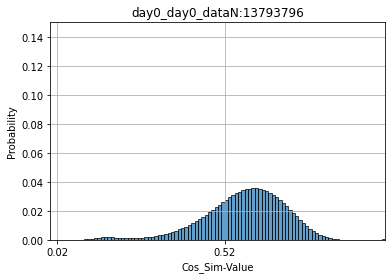

[0.62612724 0.32649314 0.37081492 ... 0.53843933 0.5380982  0.6186714 ]


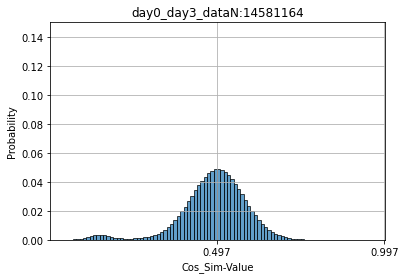

[0.49296188 0.66190493 0.7109306  ... 0.4882918  0.5566163  0.5828394 ]


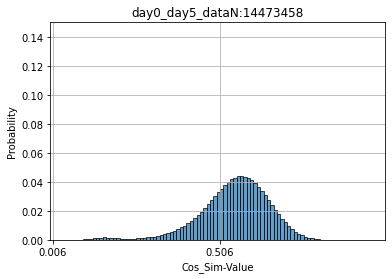

[0.49358237 0.21163863 0.35215494 ... 0.38065618 0.5172758  0.44023865]


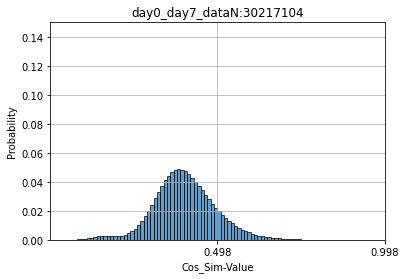

[0.62612724 0.65781355 0.62181884 ... 0.5724259  0.5364822  0.6186714 ]


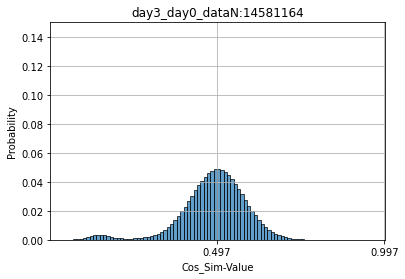

[1.         0.3462481  0.39780942 ... 0.6977026  0.7747858  1.        ]


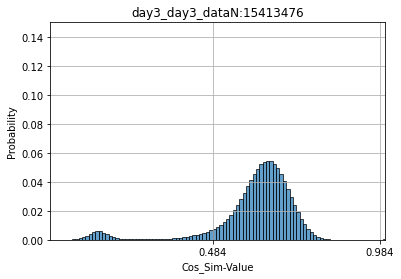

[0.5326545  0.5715236  0.6448869  ... 0.56414187 0.7294739  0.72910374]


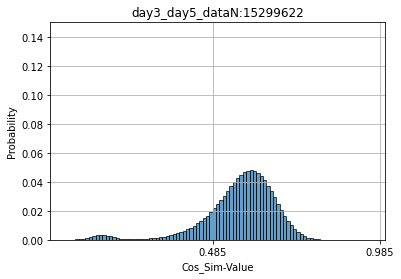

[0.51327056 0.20411858 0.38529524 ... 0.3972288  0.44537035 0.5021109 ]


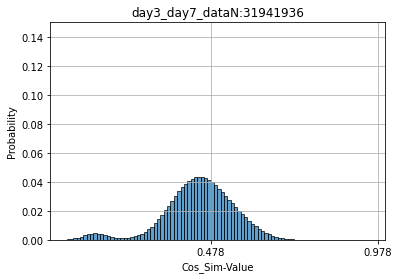

[0.49296188 0.46942893 0.48193464 ... 0.540847   0.54085314 0.5828394 ]


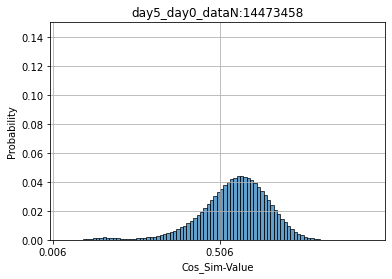

[0.5326545  0.42564335 0.4314759  ... 0.57561105 0.6807416  0.72910374]


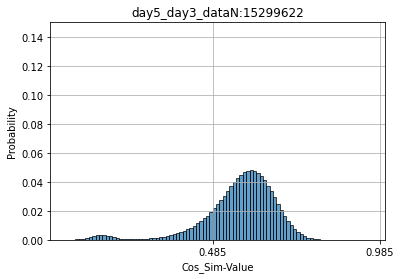

[1.0000001  0.61717296 0.57665837 ... 0.6222857  0.802135   1.        ]


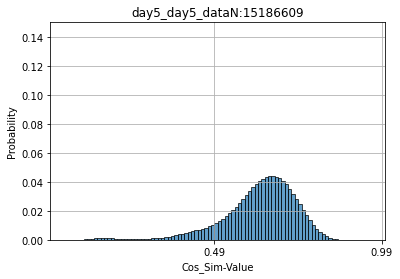

[0.5018095  0.23851922 0.46588    ... 0.41371349 0.42069238 0.4421951 ]


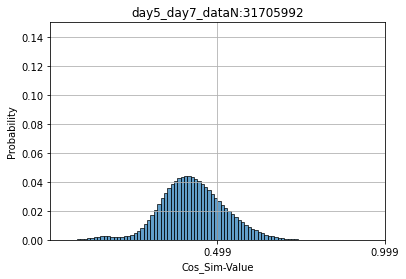

[0.49358237 0.46593103 0.49744168 ... 0.45845005 0.42864063 0.44023865]


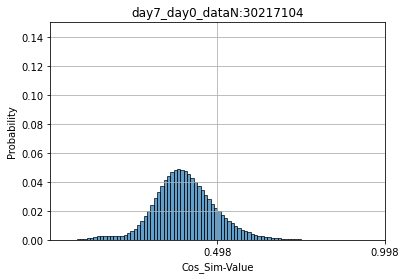

[0.51327056 0.6497563  0.5814969  ... 0.51594466 0.4273518  0.5021109 ]


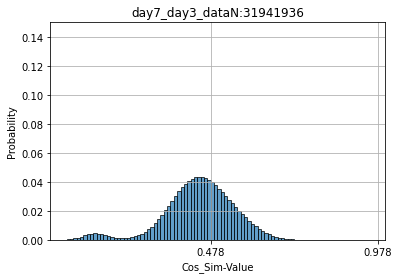

[0.5018095  0.50928956 0.50550795 ... 0.41571516 0.49298614 0.4421951 ]


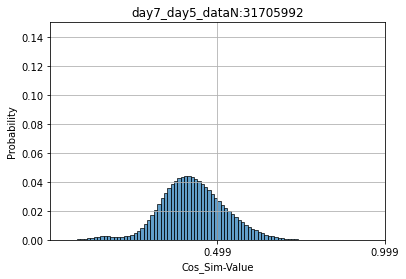

[1.0000001  0.4522372  0.46356758 ... 0.5297326  0.5050781  1.        ]


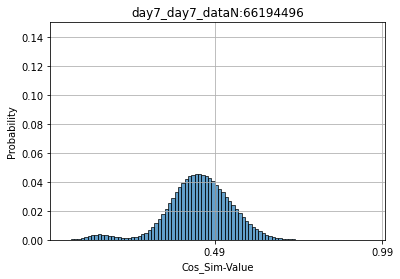

<Figure size 432x288 with 0 Axes>

In [41]:

NPY_SAVE_FOLDER = save_folder_path = os.path.basename(DATASET_PATH) + os.path.basename(os.path.dirname(DATASET_PATH))
SAVE_PATH = os.path.join(NPY_SAVE_FOLDER, "figure")
if(os.path.exists(SAVE_PATH)==False):
    os.mkdir(SAVE_PATH)

days = ["day0", "day3", "day5", "day7"]
days_list = [day0, day3, day5, day7]

indices = range(len(days))# 各要素のインデックスを取得

# インデックスの組み合わせを取得
index_combinations = list(itertools.product(indices, repeat=2))

#全日付の組み合わせでnpyデータ取得
for index_combi in index_combinations:
    data = np.load(os.path.join(NPY_SAVE_FOLDER, days[index_combi[0]] + "_" + days[index_combi[1]] + ".npy"))
    data_num = len(data)
    #data = (data - np.min(data)) / (np.max(data) - np.min(data))# データを正規化

    # ヒストグラムを作成
    bin_width = 0.01  # ヒストグラムのビンの幅
    bin_edges = np.arange(min(data), max(data) + bin_width, bin_width)
    plt.hist(data, bins=bin_edges, edgecolor='black', alpha=0.7, weights=np.ones(len(data)) / len(data))

    # グラフの設定
    plt.xlabel('Cos_Sim-Value')
    plt.ylabel('Probability')
    plt.title(days[index_combi[0]] + "_" + days[index_combi[1]] + "_dataN:"+str(data_num))
    plt.xticks(np.arange(min(data), max(data) + 1, 0.5))
    
    plt.xlim(0, 1)
    plt.ylim(0, 0.15)

    # グリッドの表示
    plt.grid(True)

    # ヒストグラムを表示
    plt.savefig(os.path.join(SAVE_PATH, days[index_combi[0]] + "_" + days[index_combi[1]]) + ".png")
    plt.show()